# Estructuras Discretas 2023-1
## Práctica 4: Dispositivos digitales combinatorios

Víctor Germán Mijangos de la Cruz: vmijangosc@ciencias.unam.mx

Teresa Becerril Torres: terebece1508@ciencias.unam.mx

**Integrantes del equipo:**

* Decuir Fuentes Rodrigo André
* Durán Tapia Emilio

## 1. Decodificador y visualizador de digitos

Para visualizar los digitos con un circuito digital se puede usar un displayer que permita visualizar los digitos en un formato amigable para el usuario. Para hacer esto, se necesita, primero, un decodificador de números binarios que es un circuito digital sencillo, aunque con muchas entradas.



In [71]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Decodificador de 4 bits 

Un decodificador es un circuito que toma una cadena de bits y devuelve un índice correspondiente al número decimal que se trate.

Este decodificador usa compurtas $NOT$ y $AND$, básicamente se toma en cuenta los valores binarios, y se toma el $AND$ sobre los valores verdaderos (1) de los bits.

**Ejemplo**

El 0, se expresa en binario como 0000, se usarán los valores $\overline{a}\overline{b}\overline{c}\overline{d}$ para esta compuerta. Para el caso del 2, se expresa en binario como 0010, la compuerta $AND$ tomará como entrada $\overline{a}\overline{b}c\overline{d}$.

Gráficamente, se puede ver como sigue en el caso de 3 bits:

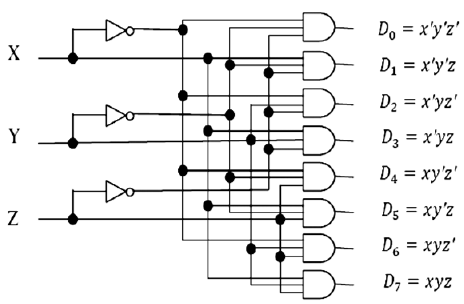

En esta práctica adaptamos esta idea al caso de 4 bits.

In [72]:
def BinaryDecoder(a, b, c, d):
    """
    Decodificador de 4 digitos binarios.
    
    Argumentos
    ---------
    a,b,c,d : binary
        Los digitos de la cadena binaria que expresan el número a decodificar.
    
    Return
    -------
    Índice que corresponde al número decimal.
    """
    # Puertas not.
    not_a = 1-a
    not_b = 1-b
    not_c = 1-c
    not_d = 1-d
    
    # Purtas de salida (AND) para los digitos de 0 a 9.
    d0 = not_a * not_b * not_c * not_d
    d1 = not_a * not_b * not_c * d
    d2 = not_a * not_b * c * not_d
    d3 = not_a * not_b * c * d
    d4 = not_a * b * not_c * not_d
    d5 = not_a * b * not_c * d
    d6 = not_a * b * c * not_d
    d7 = not_a * b * c * d
    d8 = a * not_b * not_c * not_d
    d9 = a * not_b * not_c * d
    
    return [d0, d1, d2, d3, d4, d5, d6, d7, d8, d9]

Este decodificador regresa una cadena donde el único 1 se activa en el valor del decimal correspondiente. Por ejemplo, mapea 0010 a 00100000, pues índica que es el número 2 en decimal.

In [73]:
# Decodificación de 0000.
print(BinaryDecoder(0,0,0,0))

# Decodificación de 0010.
print(BinaryDecoder(0,0,1,0))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


### 1.2 Displayer

Una vez que tenemos el decodificador, podemos utilizar el displayer para visualizar los digitos. Básicamente el displayer cuenta con 7 leds que se prenden según el número que quieren visualizar. La estructura de un displayer es como sigue:

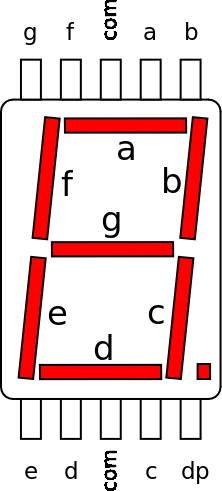

Por ejemplo, si queremos ver el número 0 en el displayer, el decodificador nos regresa [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], y se tiene que encender los leds $f,a,b,c,d$ y $e$. El displayer funcionará con compuertas $NOT$, cada compuerta representa uno de los leds. Las operaciones $OR$ se harán sobre los digitos que necesiten encender este led. Por ejemplo, para el led $a$ los digitos que lo requieren serán 0, 2, 3, 5, 6, 7, 8 y 9, sólo exceptuando al 1 que no usa este led. Por tanto, usaremos una puerta $OR$ sobre estos valores.

In [74]:
def display(a, b, c, d):
    """
    Desplega la visualización de un digito en base leds y a un decodificador binario.
    
    Argumentos
    ---------
    a,b,c,d : binary
        Digitos de la cadena binaria a visualizar.
        
    Return
    -------
        Display del digito correspondiente a la cadena binarias.
    """

    # Obtención de los índices del decodificador binario.
    d0,d1,d2,d3,d4,d5,d6,d7,d8,d9 = BinaryDecoder(a,b,c,d)
    
    # Puertas OR para el displayer 
    up = d0 or d2 or d3 or d5 or d6 or d7 or d8 or d9
    left1 = d0 or d4 or d5 or d6 or d8 or d9
    right1 = d0 or d1 or d2 or d3 or d4 or d7 or d8 or d9
    mid = d2 or d3 or d4 or d5 or d6 or d8 or d9
    left2 = d0 or d2 or d6 or d8
    right2 = d0 or d1 or d3 or d4 or d5 or d6 or d7 or d8 or d9
    down = d0 or d2 or d3 or d5 or d6 or d8 
    
    # Transformarmos el displayer en pixeles para una imagen.
    pixels = np.array([[up, up, up], 
                    [left1, 0, right1],
                    [left2, mid, right1],
                    [left2, 0, right2],
                    [down, down, down]])
    # Se muestra la imagen en escala de grises.
    plt.imshow(pixels, cmap='Greys')
    plt.show()

Ahora podemos usar el displayer para visualizar una cadena binaria como un número decimal.

Display de 0011


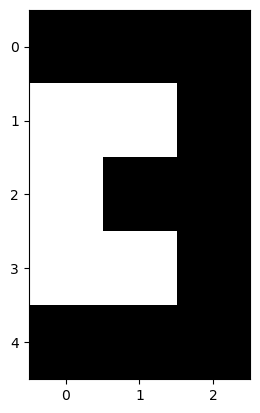

Display de 0010


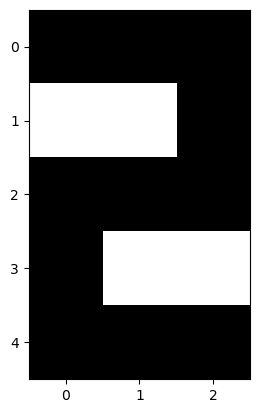

In [75]:
# Display 0011 correspondiente a 3.
print("Display de 0011")
display(0,0,1,1)

# Display 0010 correspondiente a 2.
print("Display de 0010")
display(0,0,1,0)

### 1.3 Ejercicio 

Crear un ciclo que permita visualizar cada uno de los 9 digitos utilizando la función `display()`.



Display de:  0000


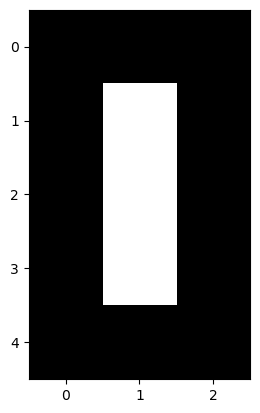

Display de:  0001


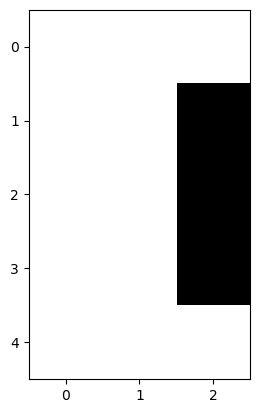

Display de:  0010


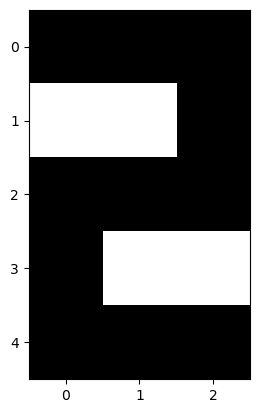

Display de:  0011


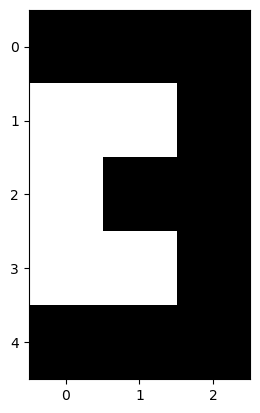

Display de:  0100


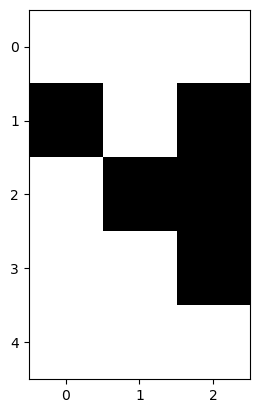

Display de:  0101


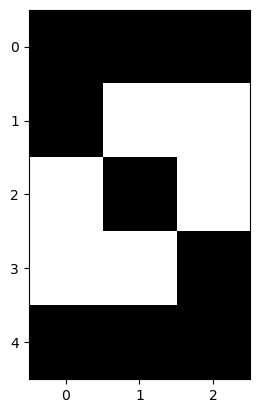

Display de:  0110


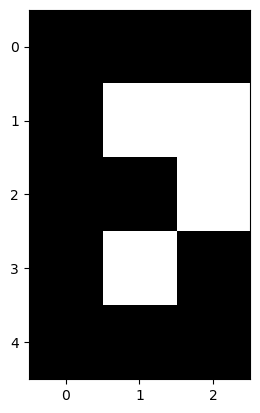

Display de:  0111


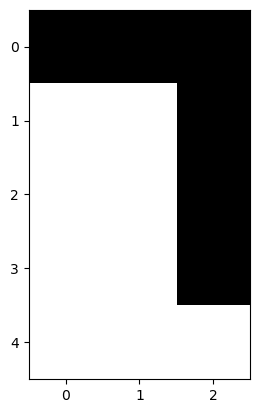

Display de:  1000


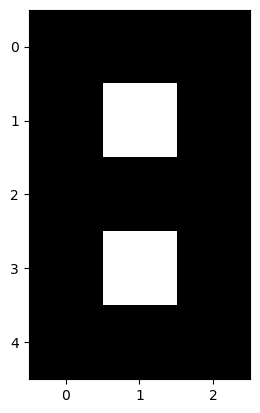

Display de:  1001


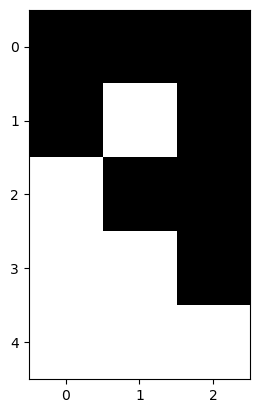

In [77]:
# Ciclo que permite visualizar cada uno de los 9 digitos.

y = range(10)               
for x in y:
    binario = '{:0{}b}'.format(x,4)
    print("Display de: ", binario)
    display(int(binario[0]), int(binario[1]), int(binario[2]), int(binario[3]))

## 2. Sumadores

Los sumadores son circuitos que operan sobre un número dado de bits para sumarlos. Estos se construyen a partir de compueras XOR.

In [36]:
def XOR(x, y):
    """
    Función XOR
    """
    return (x and not y) or (not x and y)

### 2.1 Half-Adder

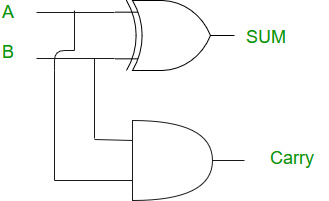

In [37]:
class HalfAdder(object):
    """
    Simulador de circuito Half-Adder.
    """
    def __init__(self):
        self.suma = 0
        self.acarreo = 0
        
    def apply(self, x, y):
        #Suma con XOR.
        self.suma = 1 * XOR(x, y)
        
        #Acarreo xy.
        self.acarreo = x * y
    
        return self.suma, self.acarreo

In [38]:
# Se crea una instancia de la clase HalfAdder.
HA = HalfAdder()

# Ciclo que imprime la suma y el acarreo de x e y. 
for x in [0,1]: # suma que obtienes al sumar
    for y in [0,1]: # acarreo
        print(x, y, HA.apply(x, y))

0 0 (0, 0)
0 1 (1, 0)
1 0 (1, 0)
1 1 (0, 1)


### 2.2 Full-Adder

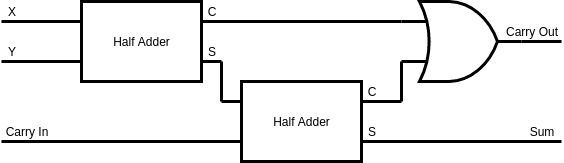

In [39]:
class FullAdder(object):
    """
    Simulador de circuito Full-Adder.
    """
    def __init__(self):
        self.suma = 0
        self.accarreo = 0
        #Primer Half-Adder (sumador)
        self.HA1 = HalfAdder()
        #Segundo Half-Adder
        self.HA2 = HalfAdder()
        
    def apply(self, x, y, z):
        #Aplica half-adder a las entradas x y.
        self.HA1.apply(x,y) 
        
        #Aplica half-adder a la salida anterior y a z.
        self.HA2.apply(self.HA1.suma, z)
        
        #Guarda la suma y el acarreo.
        self.suma = self.HA2.suma
        self.acarreo = self.HA1.acarreo or self.HA2.acarreo
        
        return self.suma, self.acarreo

In [40]:
# Se crea una instancia de la clase FullAdder.
FA = FullAdder()

# Ciclo queimprime la suma y el acarreo de x y z. 
for x in [0,1]:
    for y in [0,1]:
        for z in [0,1]:
            print(x,y,z, FA.apply(x,y,z))

0 0 0 (0, 0)
0 0 1 (1, 0)
0 1 0 (1, 0)
0 1 1 (0, 1)
1 0 0 (1, 0)
1 0 1 (0, 1)
1 1 0 (0, 1)
1 1 1 (1, 1)


### 2.3 Sumador binario de 4 bits

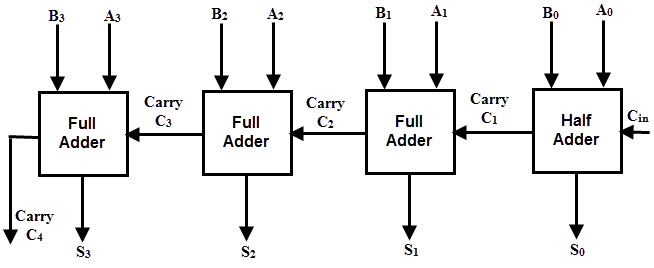

In [41]:
class BinaryAdder(object):
    """
    Simulador de circuito sumador para 4 bits.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Se usan 4 full-adders, uno por cada bit.
        self.FA1 = FullAdder()
        self.FA2 = FullAdder()
        self.FA3 = FullAdder()
        self.FA4 = FullAdder()
        
    def sum(self, a1, a2, a3, a4, b1, b2, b3, b4):
        #Se aplican los full-adders de derecha a izquierda.
        self.FA1.apply(a4,b4,self.acarreo)
        self.FA2.apply(a3,b3,self.FA1.acarreo)
        self.FA3.apply(a2,b2,self.FA2.acarreo)
        self.FA4.apply(a1,b1,self.FA3.acarreo)
        
        #Guarda la suma y el acarreo.
        self.suma = (self.FA4.suma, self.FA3.suma, self.FA2.suma, self.FA1.suma)
        self.acarreo = self.FA4.acarreo
        
        return self.suma, self.acarreo

In [42]:
# Se crea una instancia de la clase BinaryAdder.
sumador = BinaryAdder(c=0)

# Bits del primer número.
a1,a2,a3,a4 = 0,1,1,1

# Bits del segundo número.
b1,b2,b3,b4 = 1,0,0,1

# Resultado y acarreo de sumar dos números utilizando un sumador binario de 4 bits.
result, c = sumador.sum(a1, a2, a3, a4, b1, b2, b3, b4)
print('Suma binario: {}\nAcarreo: {}'.format(sumador.suma, c))

Suma binario: (0, 0, 0, 0)
Acarreo: 1


### 2.4 Sumador BCD 

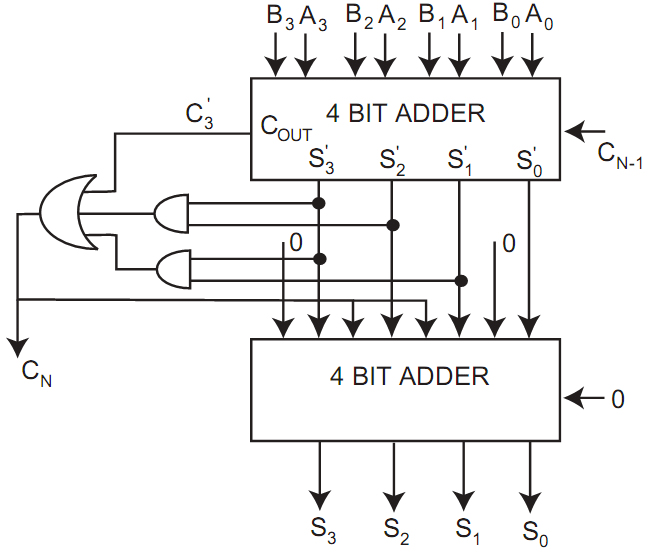

In [65]:
class BCDAdder(object):
    """
    Simulador de circuito para sumador BCD.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Se utilizan dos sumadores binarios
        self.BinAdder1 = BinaryAdder(c=c)
        self.BinAdder2 = BinaryAdder(c=0)
        
    def sum(self, a1, a2, a3, a4, b1, b2, b3, b4):
        #Se aplica el primer sumador a las entradas.
        (e1,e2,e3,e4), c2 = self.BinAdder1.sum(a1,a2,a3,a4, b1,b2,b3,b4)
    
        #Se calcula el acarreo.
        c = c2 or e1 * e2 or e1 * e3
        
        #Se aplica el segundo sumador.
        bcd_sum, c3 = self.BinAdder2.sum(e1,e2,e3,e4, 0,c,c,0,)
        
        #Se guarda la suma y el acarreo.
        self.suma = bcd_sum
        self.acarreo = c
        
        return self.suma, self.acarreo

In [66]:
# Se crea una instancia de la clase BCDAdder.
sumador_bcd = BCDAdder(c=0)

# Bits del primer número.
a1,a2,a3,a4 = 0,0,0,1

# Bits del segundo número.
b1,b2,b3,b4 = 1,0,0,1

# Resultado y acarreo de sumar dos números utilizando un sumador BCD.
result, c = sumador_bcd.sum(a1,a2,a3,a4, b1,b2,b3,b4)

print('Suma binario: {}\nAcarreo: {}'.format(result, c))

Suma binario: (0, 0, 0, 0)
Acarreo: 1


### 2.5 Sumador BCD con displayer

In [67]:
import matplotlib.pyplot as plt

class DecimalAdder(object):
    """
    Simulador de un circuito para sumar bcd con displayer decimal.
    """
    def __init__(self, c=0):
        self.suma = (0,0,0,0)
        self.acarreo = c
        #Sumador BCD.
        self.Adder = BCDAdder(c = c)
        #Recupera código binario de decimales.
        self.digits = {0:(0,0,0,0), 1:(0,0,0,1), 2:(0,0,1,0), 3:(0,0,1,1), 4:(0,1,0,0), 5:(0,1,0,1),
                       6:(0,1,1,0), 7:(0,1,1,1), 8:(1,0,0,0), 9:(1,0,0,1)}

    def displayer(self, a, b, c, d):
      # Obtención de los índices del decodificador binario.
      d0,d1,d2,d3,d4,d5,d6,d7,d8,d9 = BinaryDecoder(a, b, c, d)
    
      # Puertas OR para el displayer 
      up = d0 or d2 or d3 or d5 or d6 or d7 or d8 or d9
      left1 = d0 or d4 or d5 or d6 or d8 or d9
      right1 = d0 or d1 or d2 or d3 or d4 or d7 or d8 or d9
      mid = d2 or d3 or d4 or d5 or d6 or d8 or d9
      left2 = d0 or d2 or d6 or d8
      right2 = d0 or d1 or d3 or d4 or d5 or d6 or d7 or d8 or d9
      down = d0 or d2 or d3 or d5 or d6 or d8 
    
      # Transformarmos el displayer en pixeles para una imagen.
      pixels= np.array([[up, up, up], 
                      [left1, 0, right1],
                      [left2, mid, right1],
                      [left2, 0, right2],
                      [down, down, down]])
      return pixels
    
    def sum(self, d1, d2):
        #Transforma los inputs en binarios.
        a1,a2,a3,a4 = self.digits[d1]
        b1,b2,b3,b4 = self.digits[d2]
        
        #Realiza la suma.
        self.suma, self.acarreo = self.Adder.sum(a1, a2, a3, a4, b1, b2, b3, b4)
        
        #Aplica el display decimal a los digitos binarios.
        display_acarreo = self.displayer(0,0,0, self.acarreo)
        display_suma = self.displayer(self.suma[0], self.suma[1], self.suma[2], self.suma[3])
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(1,1))
        ax1.imshow(display_acarreo, cmap='Greys')
        ax1.axis('off')
        ax2.imshow(display_suma, cmap='Greys')
        ax2.axis('off')
        plt.show()

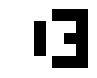

In [68]:
# Se crea una instancia de la clase DecimalAdder
sumador = DecimalAdder(c=0)

# Se muestra el resultado de la suma en un displayer.
sumador.sum(8,5)

### 2.6 Ejercicio

Crear un ciclo que sume x e y utilizando el sumador BCD con displayer. Los valores de x e y deben ser de 0 a 10. 

Suma de 0 + 0


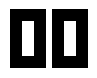

Suma de 0 + 1


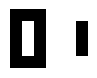

Suma de 0 + 2


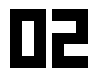

Suma de 0 + 3


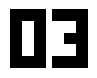

Suma de 0 + 4


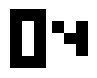

Suma de 0 + 5


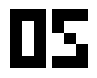

Suma de 0 + 6


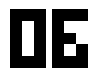

Suma de 0 + 7


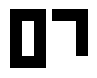

Suma de 0 + 8


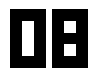

Suma de 0 + 9


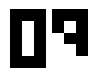

Suma de 1 + 0


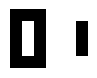

Suma de 1 + 1


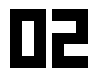

Suma de 1 + 2


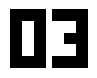

Suma de 1 + 3


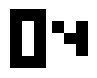

Suma de 1 + 4


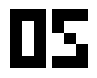

Suma de 1 + 5


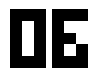

Suma de 1 + 6


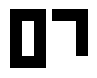

Suma de 1 + 7


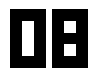

Suma de 1 + 8


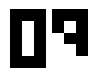

Suma de 1 + 9


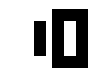

Suma de 2 + 0


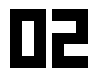

Suma de 2 + 1


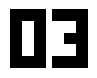

Suma de 2 + 2


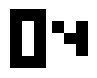

Suma de 2 + 3


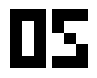

Suma de 2 + 4


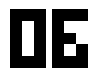

Suma de 2 + 5


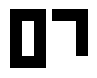

Suma de 2 + 6


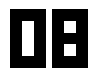

Suma de 2 + 7


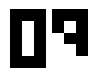

Suma de 2 + 8


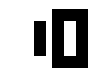

Suma de 2 + 9


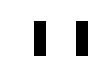

Suma de 3 + 0


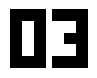

Suma de 3 + 1


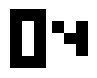

Suma de 3 + 2


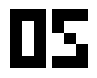

Suma de 3 + 3


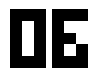

Suma de 3 + 4


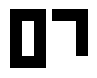

Suma de 3 + 5


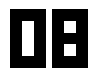

Suma de 3 + 6


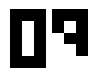

Suma de 3 + 7


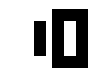

Suma de 3 + 8


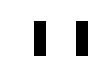

Suma de 3 + 9


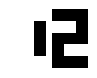

Suma de 4 + 0


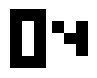

Suma de 4 + 1


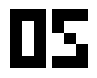

Suma de 4 + 2


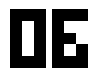

Suma de 4 + 3


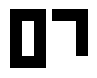

Suma de 4 + 4


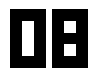

Suma de 4 + 5


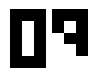

Suma de 4 + 6


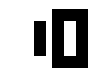

Suma de 4 + 7


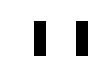

Suma de 4 + 8


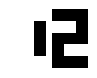

Suma de 4 + 9


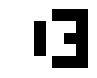

Suma de 5 + 0


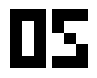

Suma de 5 + 1


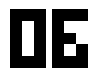

Suma de 5 + 2


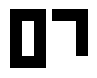

Suma de 5 + 3


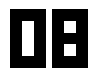

Suma de 5 + 4


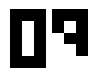

Suma de 5 + 5


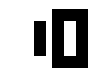

Suma de 5 + 6


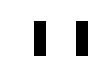

Suma de 5 + 7


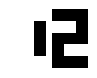

Suma de 5 + 8


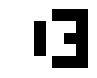

Suma de 5 + 9


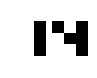

Suma de 6 + 0


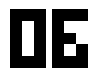

Suma de 6 + 1


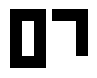

Suma de 6 + 2


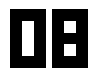

Suma de 6 + 3


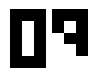

Suma de 6 + 4


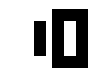

Suma de 6 + 5


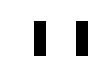

Suma de 6 + 6


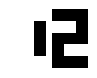

Suma de 6 + 7


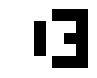

Suma de 6 + 8


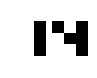

Suma de 6 + 9


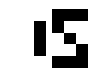

Suma de 7 + 0


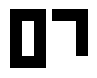

Suma de 7 + 1


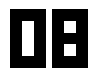

Suma de 7 + 2


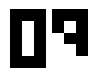

Suma de 7 + 3


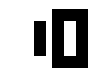

Suma de 7 + 4


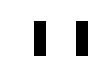

Suma de 7 + 5


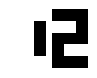

Suma de 7 + 6


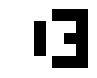

Suma de 7 + 7


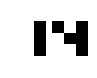

Suma de 7 + 8


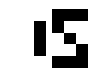

Suma de 7 + 9


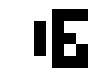

Suma de 8 + 0


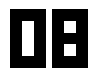

Suma de 8 + 1


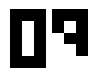

Suma de 8 + 2


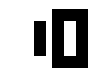

Suma de 8 + 3


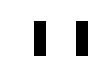

Suma de 8 + 4


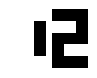

Suma de 8 + 5


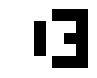

Suma de 8 + 6


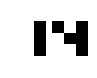

Suma de 8 + 7


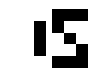

Suma de 8 + 8


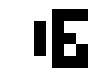

Suma de 8 + 9


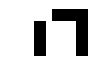

Suma de 9 + 0


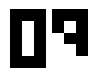

Suma de 9 + 1


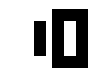

Suma de 9 + 2


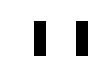

Suma de 9 + 3


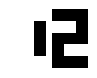

Suma de 9 + 4


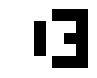

Suma de 9 + 5


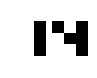

Suma de 9 + 6


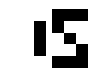

Suma de 9 + 7


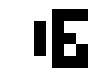

Suma de 9 + 8


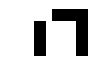

Suma de 9 + 9


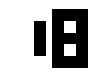

In [69]:
# Ciclo que suma x e y utilizando el sumador BCD 
for x in range(0,10):
    for y in range(0,10):
        print('Suma de {} + {}'.format(x,y))
        sumador = DecimalAdder(c=0)
        sumador.sum(x,y)